Visualisations for Tom's talk on workflow management.

In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
%matplotlib inline
# import seaborn as sns

## Cost of delay with different prioritization rules

### 1. Highest cost of delay

In [2]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [10, 3, 1], 'duration': [3, 3, 3]})

In [3]:
df

,cost_of_delay,duration,project
0,10,3,1
1,3,3,2
2,1,3,3


In [4]:
color_dict = {'Task 1': '#1b9e77', 'Task 2': '#d95f02', 'Task 3':'#7570b3'}

In [5]:
def plot_cost(ax, task_order, column='cost_of_delay', max_x=10, max_y=15):

    completed = []
    duration = 0
    for k, i in enumerate(task_order):
        bottom_val = 0
        pp = df[df.project == i]
        width = pp.duration.values[0]
    
        completed.append(i)
        still_togo = list(set(task_order) - set(completed))

        for p_val in still_togo:
            p = df[df.project == p_val]
            ax.bar(duration, p[column], width=width, bottom=bottom_val, color='black', alpha=0.8)
            bottom_val += p[column].values[0]
        
        ax.bar(duration, pp[column], bottom=bottom_val, width=width, alpha=0.7, label='Task ' + str(i),
               color=color_dict['Task ' + str(i)])
        duration += width

    ax.set_ylim(0, max_y)
    ax.set_xlim(0, max_x)
    ax.set_xticks(range(0, max_x + 3, 3))
    ax.set_xticklabels(range(0, max_x + 3, 3), size=15)
    
    ax.set_yticks(range(0, max_y + 2, 2))
    ax.set_yticklabels(range(0, max_y + 2, 2), size=15)
    ax.set_ylabel('Cost of Delay', size=16)
    ax.set_xlabel('Duration', size=16)
    ax.legend(fontsize='xx-large')
    ax.grid()
    ax.set_title('Order = ' + str(task_order), size=20)

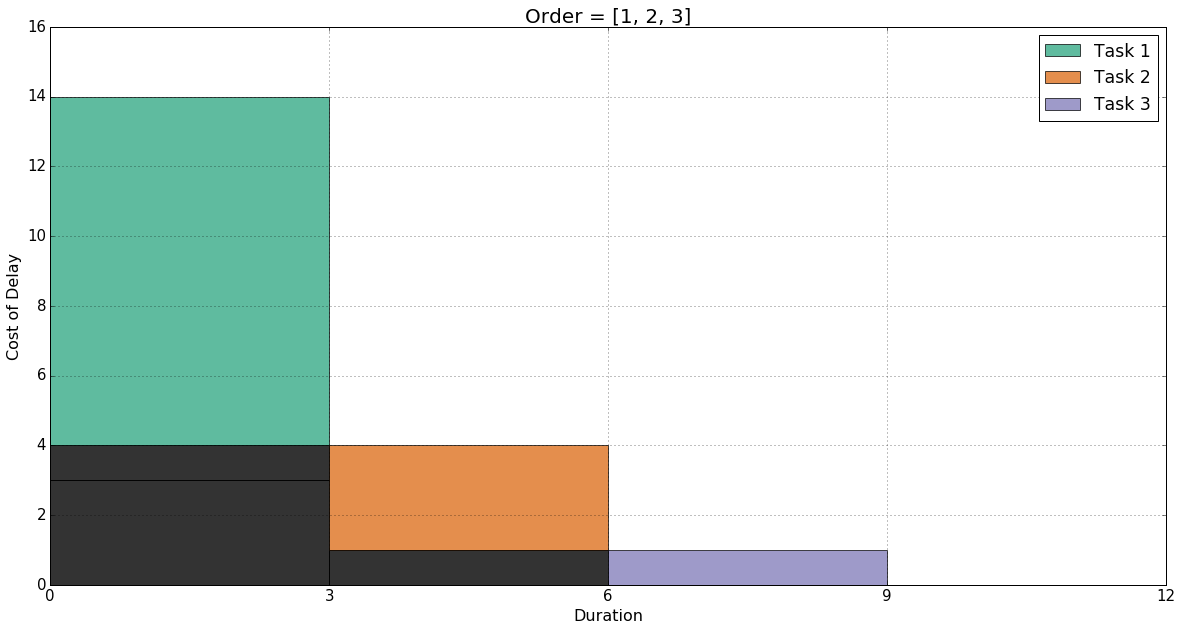

In [6]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order)
pl.show()

**Change the order: 3, 2, 1.**

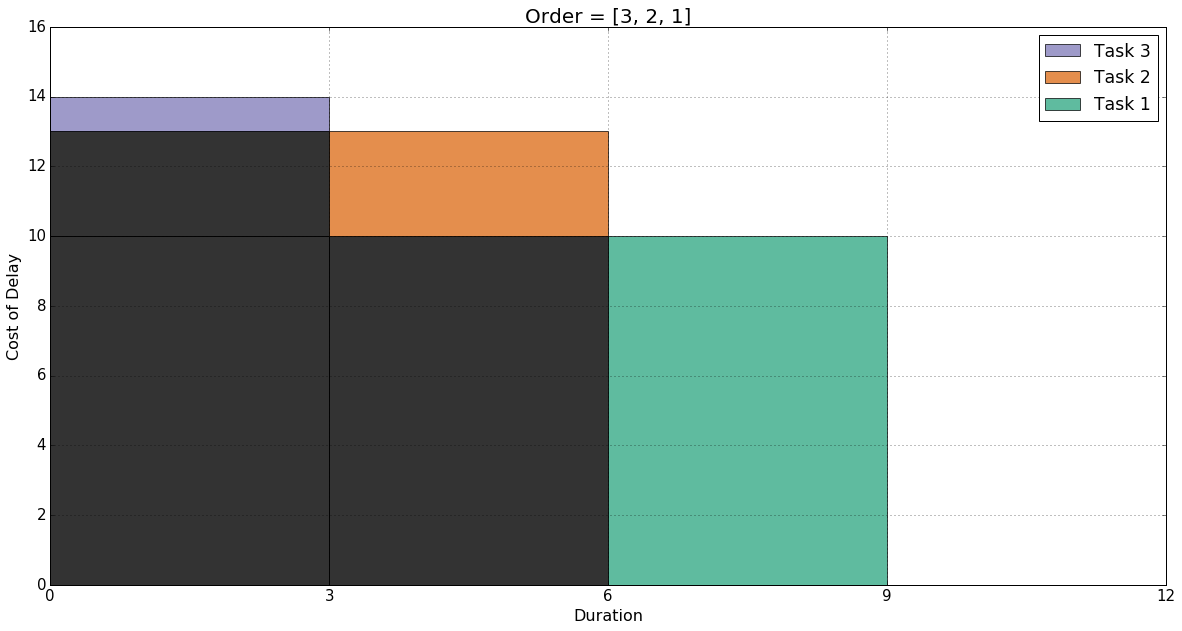

In [7]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order)
pl.show()

### 2. Shortest first vs longest first

In [8]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [3, 3, 3], 'duration': [1, 3, 10]})

In [9]:
df

,cost_of_delay,duration,project
0,3,1,1
1,3,3,2
2,3,10,3


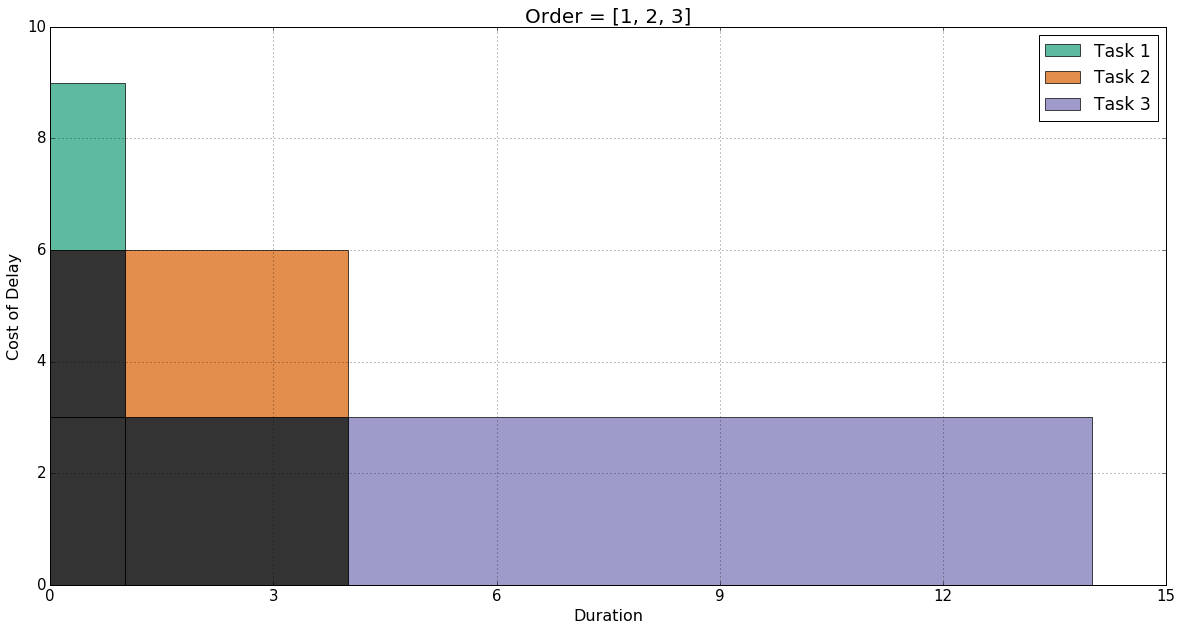

In [10]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, max_y=10, max_x=15)
pl.show()

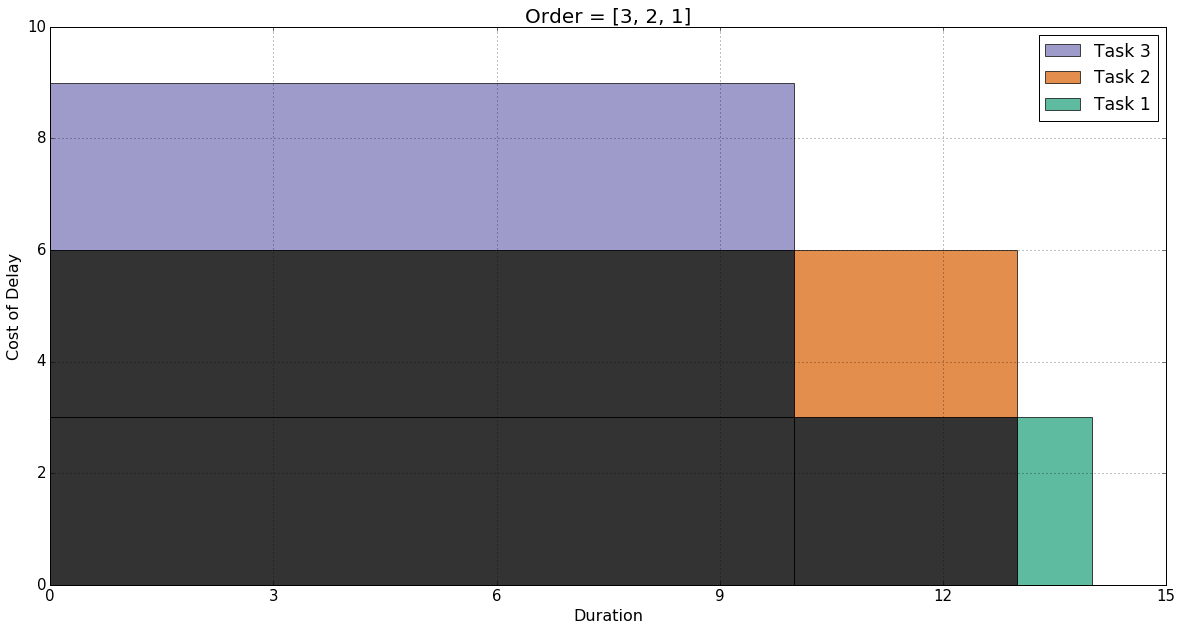

In [11]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, max_y=10, max_x=15)
pl.show()

### Weighted

In [12]:
df = pd.DataFrame({'project': [1, 2, 3], 'cost_of_delay': [10, 3, 1], 'duration': [1, 3, 10]})

In [13]:
df['cod_duration'] = df.cost_of_delay / df.duration

In [14]:
df

,cost_of_delay,duration,project,cod_duration
0,10,1,1,10.0
1,3,3,2,1.0
2,1,10,3,0.1


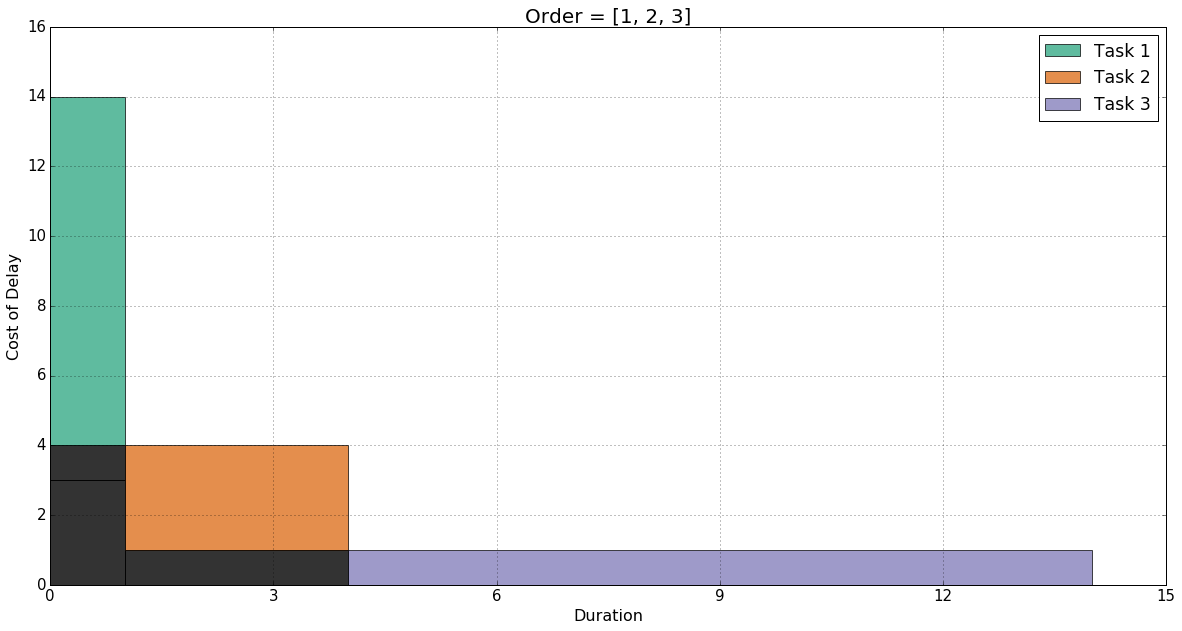

In [22]:
task_order = [1, 2, 3]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, column='cost_of_delay', max_y=15, max_x=15)
pl.show()

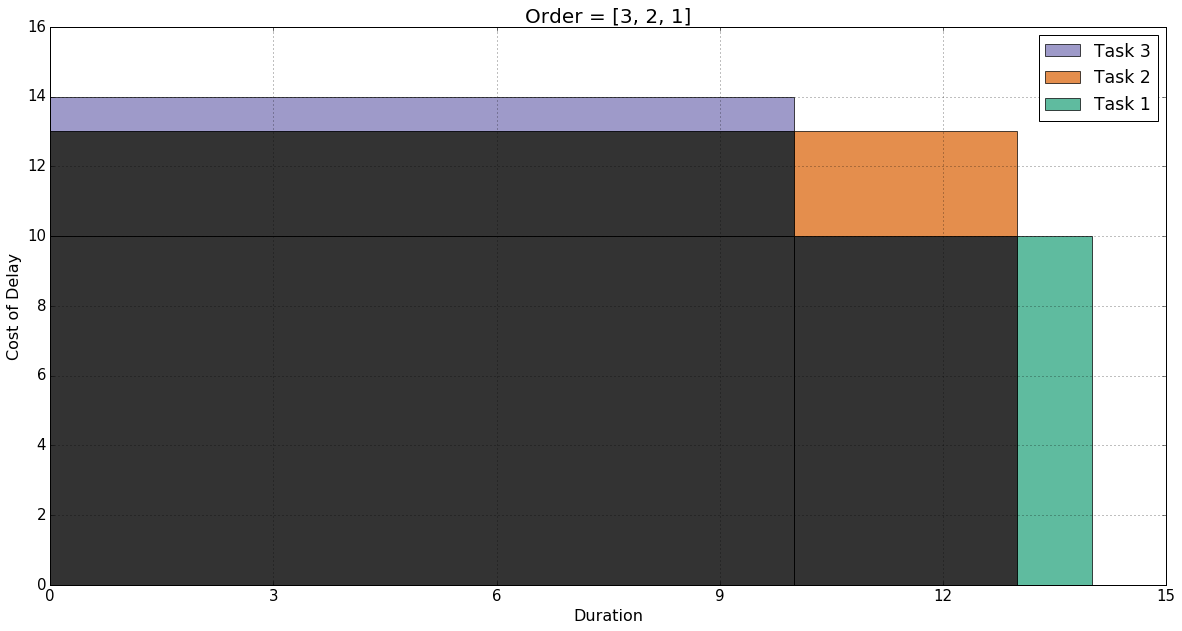

In [21]:
task_order = [3, 2, 1]
fig, ax = pl.subplots(figsize=(20, 10))
plot_cost(ax, task_order, column='cost_of_delay', max_y=15, max_x=15)
pl.show()

## Optimal Capacity

Point at the bottom of the U curve. 


In [81]:
AVERAGE_C_PER_ITER = 8.
ARRIVAL_RATE_PER_ITER = 8.
CC_PER_ITER = 5000.
COD_PER_ITEM_PER_ITER = 25.

In [82]:
df = pd.DataFrame({'capacity_utilisation': range(10, 101, 5)})

In [83]:
df.capacity_utilisation = df.capacity_utilisation / 100

In [84]:
df['num_items_in_queue'] = df.capacity_utilisation.apply(lambda x: np.square(x) / (1-x) * AVERAGE_C_PER_ITER)

In [85]:
df.head()

,capacity_utilisation,num_items_in_queue
0,0.10,0.088889
1,0.15,0.211765
2,0.20,0.400000
3,0.25,0.666667
4,0.30,1.028571


In [94]:
df['cod'] = df.num_items_in_queue.apply(lambda x: x * COD_PER_ITEM_PER_ITER)

In [95]:
df

,capacity_utilisation,num_items_in_queue,cod
0,0.10,0.088889,2.222222
1,0.15,0.211765,5.294118
2,0.20,0.400000,10.000000
3,0.25,0.666667,16.666667
4,0.30,1.028571,25.714286
5,0.35,1.507692,37.692308
6,0.40,2.133333,53.333333
7,0.45,2.945455,73.636364
8,0.50,4.000000,100.000000
9,0.55,5.377778,134.444444


In [96]:
df['cc'] = df.capacity_utilisation.apply(lambda x: (1 - x) * CC_PER_ITER)

In [97]:
df['total_cost'] = df.cod + df.cc

In [98]:
df

,capacity_utilisation,num_items_in_queue,cod,cc,total_cost
0,0.10,0.088889,2.222222,4500.0,4502.222222
1,0.15,0.211765,5.294118,4250.0,4255.294118
2,0.20,0.400000,10.000000,4000.0,4010.000000
3,0.25,0.666667,16.666667,3750.0,3766.666667
4,0.30,1.028571,25.714286,3500.0,3525.714286
5,0.35,1.507692,37.692308,3250.0,3287.692308
6,0.40,2.133333,53.333333,3000.0,3053.333333
7,0.45,2.945455,73.636364,2750.0,2823.636364
8,0.50,4.000000,100.000000,2500.0,2600.000000
9,0.55,5.377778,134.444444,2250.0,2384.444444
